## **Тема “Обучение с учителем”**

**Задание 1**

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
feature_names = boston["feature_names"]

data = boston["data"]
target = boston["target"]

X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ["Price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.3, random_state = 42)
lr = LinearRegression()

#обучение модели
lr.fit(X_train, y_train)
#предсказание
y_pred = lr.predict(X_test)

#сопоставление предсказанных и реальных
check_test = pd.DataFrame({
    'y_test': y_test["Price"],
    'y_pred': y_pred.flatten()
})

check_test["Error"] = check_test["y_pred"]  - check_test["y_test"]

#mse1 = (check_test["Error"] ** 2).mean()
#mse2 = mean_squared_error(check_test['y_pred'], check_test['y_test'])
#mse1 = 21.517444231177 
#mse2 = 21.517444231176995

(np.abs(check_test["Error"])).mean()
#3.162709871457379

r2_score(y_test["Price"], y_pred)

0.711226005748496

In [2]:
check_test

,y_test,y_pred,Error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280
...,...,...,...
441,17.1,17.403672,0.303672
23,14.5,13.385941,-1.114059
225,50.0,39.983425,-10.016575
433,14.3,16.682863,2.382863


**Задание 2**

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,

max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model = RandomForestRegressor(n_estimators=1000, max_depth = 12, random_state = 42)
model.fit(X_train, y_train.values[:,0])

y_pred = model.predict(X_test)

r2_score(y_test["Price"], y_pred)

0.87472606157312

In [4]:
check_test2 = pd.DataFrame({
    'y_test': y_test["Price"],
    'LR y_pred': check_test["y_pred"], 
    'RF y_pred': y_pred.flatten(),
    'LR Error' : check_test["Error"],
    "RF Error" : y_pred.flatten() - y_test["Price"]
})
check_test2

,y_test,LR y_pred,RF y_pred,LR Error,RF Error
173,23.6,28.648960,22.806412,5.048960,-0.793588
274,32.4,36.495014,31.131464,4.095014,-1.268536
491,13.6,15.411193,16.339125,1.811193,2.739125
72,22.8,25.403213,23.810726,2.603213,1.010726
452,16.1,18.855280,17.139521,2.755280,1.039521
...,...,...,...,...,...
441,17.1,17.403672,13.521640,0.303672,-3.578360
23,14.5,13.385941,15.112621,-1.114059,0.612621
225,50.0,39.983425,42.808700,-10.016575,-7.191300
433,14.3,16.682863,15.586103,2.382863,1.286103


В большинстве случаев RandomForest(случайный лес?) делает более точные предсказания, за счет чего R2_score(коэффициент детерменации) у него значительно выше

**Задание 3**

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


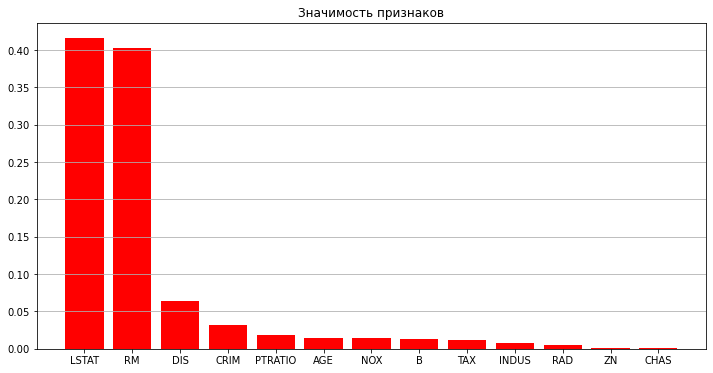

In [5]:
# ?RandomForestRegressor
# feature_importances_ : ndarray of shape (n_features,)
#     The impurity-based feature importances.
#     The higher, the more important the feature.
#     The importance of a feature is computed as the (normalized)
#     total reduction of the criterion brought by that feature.  It is also
#     known as the Gini importance.

import matplotlib.pyplot as plt

#график я нашел на https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
plt.title("Значимость признаков")
plt.gca().yaxis.grid()
plt.bar(range(X.shape[1]), importances[indices], color = 'Red', align = "center")
plt.xticks(range(X.shape[1]), feature_names[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

Можно сделать вывод, что **LSTAT (% lower status of the population)** и **RM (average number of rooms per dwelling)** признаки самые важные